In [1]:
!nvidia-smi

Wed Jul  2 11:37:51 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   41C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [6]:
# Unzip images to a custom data folder
!unzip -q /content/data.zip -d /content/custom_data

In [4]:
import os
import shutil
import random

# Paths
root_dir = "/content/custom_data/data"
images_dir = os.path.join(root_dir, "images")
labels_dir = os.path.join(root_dir, "labels")

# Output folders
train_img_dir = os.path.join(root_dir, "train", "images")
train_lbl_dir = os.path.join(root_dir, "train", "labels")
val_img_dir = os.path.join(root_dir, "val", "images")
val_lbl_dir = os.path.join(root_dir, "val", "labels")

# Create required folders
for folder in [train_img_dir, train_lbl_dir, val_img_dir, val_lbl_dir]:
    os.makedirs(folder, exist_ok=True)

# Get all image filenames
image_files = [f for f in os.listdir(images_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
random.shuffle(image_files)

# Split 90% train, 10% val
split_idx = int(len(image_files) * 0.9)
train_files = image_files[:split_idx]
val_files = image_files[split_idx:]

# Helper to move image and corresponding label
def move_files(file_list, img_dest, lbl_dest):
    for img_file in file_list:
        img_src_path = os.path.join(images_dir, img_file)
        lbl_file = os.path.splitext(img_file)[0] + ".txt"
        lbl_src_path = os.path.join(labels_dir, lbl_file)

        # Move image
        shutil.move(img_src_path, os.path.join(img_dest, img_file))

        # Move label only if it exists
        if os.path.exists(lbl_src_path):
            shutil.move(lbl_src_path, os.path.join(lbl_dest, lbl_file))
        else:
            print(f"Warning: Label not found for image {img_file}")

# Move files
move_files(train_files, train_img_dir, train_lbl_dir)
move_files(val_files, val_img_dir, val_lbl_dir)

print("✅ Dataset successfully split and reorganized for Ultralytics YOLO.")

✅ Dataset successfully split and reorganized for Ultralytics YOLO.


In [5]:
# Move the folder from /content/custom_data/data to /content/data
!mv /content/custom_data/data /content/

In [7]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 32.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 124.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 98.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 111.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

In [8]:
# Python function to automatically create data.yaml config file
# 1. Reads "classes.txt" file to get list of class names
# 2. Creates data dictionary with correct paths to folders, number of classes, and names of classes
# 3. Writes data in YAML format to data.yaml

import yaml
import os

def create_data_yaml(path_to_classes_txt, path_to_data_yaml):

  # Read classes.txt to get class names
  if not os.path.exists(path_to_classes_txt):
    print(f'classes.txt file not found! Please create it at: {path_to_classes_txt}')
    return

  with open(path_to_classes_txt, 'r') as f:
    classes = [line.strip() for line in f if line.strip()]

  number_of_classes = len(classes)

  # Create data dictionary
  data = {
      'path': '/content/data',
      'train': 'train/images',
      'val': 'val/images',
      'nc': number_of_classes,
      'names': classes
  }

  # Write data to YAML file
  with open(path_to_data_yaml, 'w') as f:
    yaml.dump(data, f, sort_keys=False)

  print(f'Created config file at {path_to_data_yaml}')

# Define path to classes.txt and run function
path_to_classes_txt = '/content/custom_data/classes.txt'
path_to_data_yaml = '/content/data.yaml'

create_data_yaml(path_to_classes_txt, path_to_data_yaml)

# Show the contents of the YAML file
print('\n File contents:\n')
!cat /content/data.yaml


Created config file at /content/data.yaml

 File contents:

path: /content/data
train: train/images
val: val/images
nc: 3
names:
- Plastic
- Metal
- Paper


In [9]:
!yolo detect train data=/content/data.yaml model=yolov8s.pt epochs=50 imgsz=640

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
100% 21.5M/21.5M [00:00<00:00, 297MB/s]
Ultralytics 8.3.161 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, i

In [10]:
!yolo detect predict model=runs/detect/train/weights/best.pt source=data/val/images save=True

Ultralytics 8.3.161 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,126,745 parameters, 0 gradients, 28.4 GFLOPs

image 1/85 /content/data/val/images/metal105.jpg: 480x640 1 Metal, 41.4ms
image 2/85 /content/data/val/images/metal110.jpg: 480x640 1 Metal, 13.2ms
image 3/85 /content/data/val/images/metal112.jpg: 448x640 1 Metal, 40.1ms
image 4/85 /content/data/val/images/metal115.jpg: 480x640 1 Metal, 13.7ms
image 5/85 /content/data/val/images/metal152.jpg: 480x640 1 Metal, 13.1ms
image 6/85 /content/data/val/images/metal154.jpg: 480x640 1 Metal, 13.1ms
image 7/85 /content/data/val/images/metal162.jpg: 480x640 1 Metal, 13.1ms
image 8/85 /content/data/val/images/metal18.jpg: 480x640 1 Metal, 12.7ms
image 9/85 /content/data/val/images/metal191.jpg: 480x640 1 Metal, 12.3ms
image 10/85 /content/data/val/images/metal23.jpg: 480x640 1 Metal, 12.3ms
image 11/85 /content/data/val/images/metal230.jpg: 480x640 1 Metal, 12.3ms
image 12/85 /content

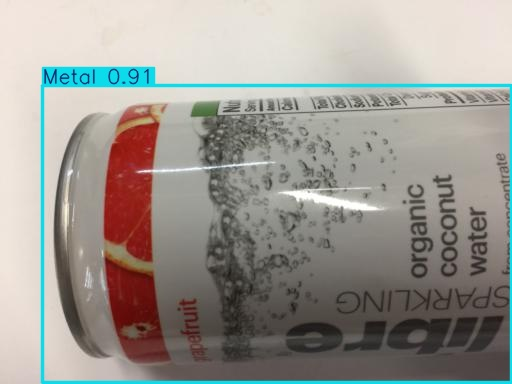

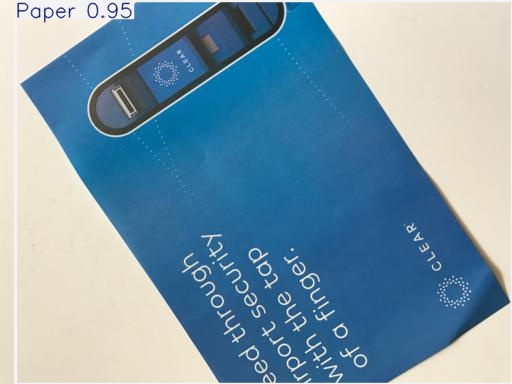

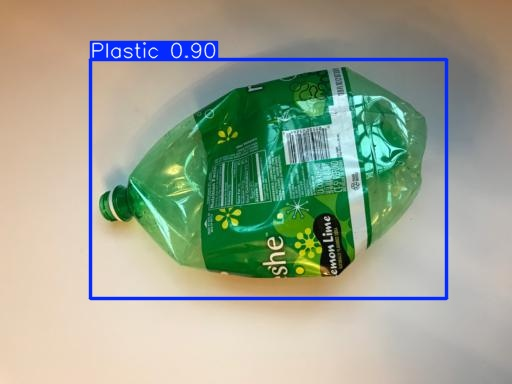

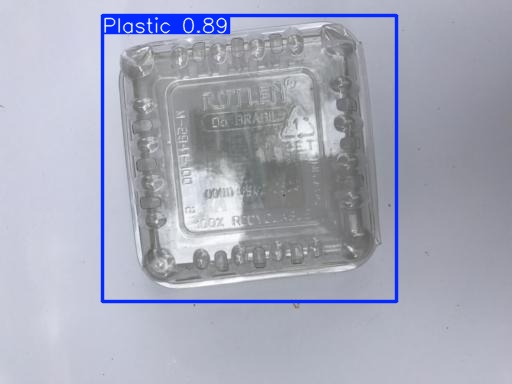

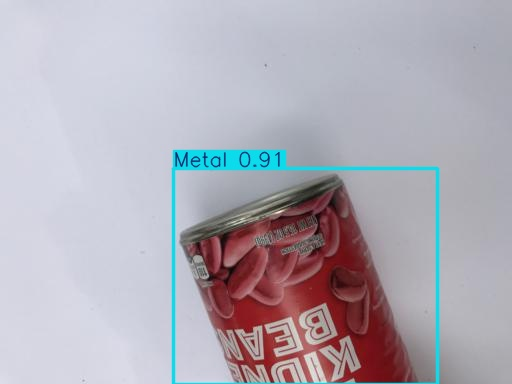

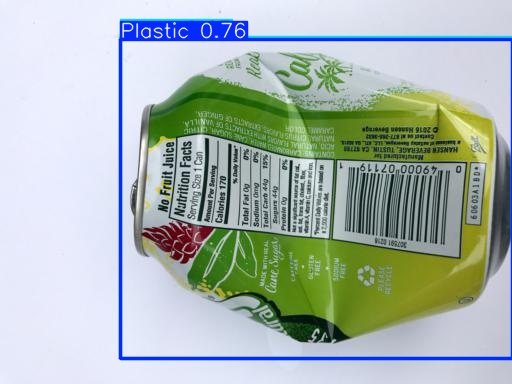

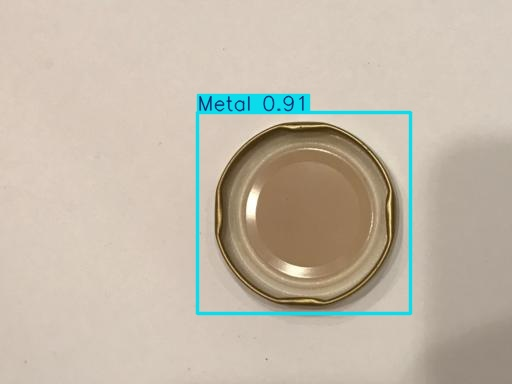

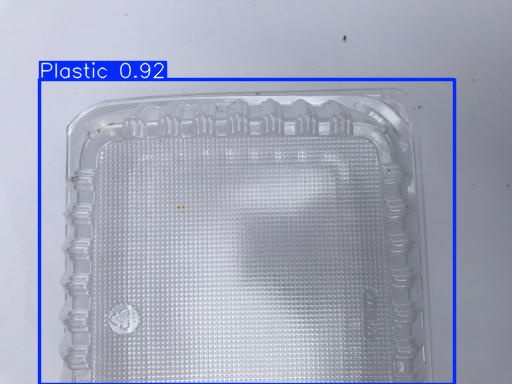

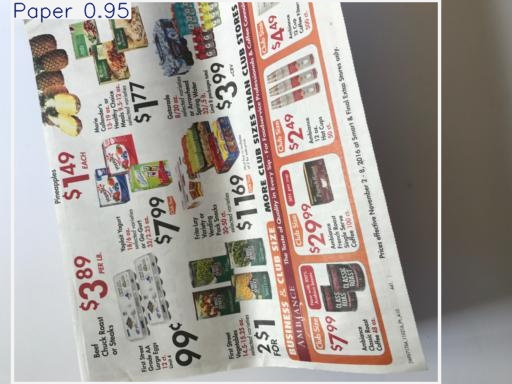

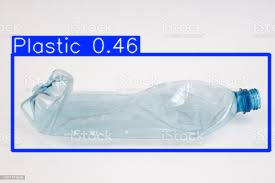

In [11]:
import glob
from IPython.display import Image, display
for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg')[:10]:
  display(Image(filename=image_path, height=400))
  print('\n')

In [12]:
# Create "my_model" folder to store model weights and train results
!mkdir /content/my_model
!cp /content/runs/detect/train/weights/best.pt /content/my_model/my_model.pt
!cp -r /content/runs/detect/train /content/my_model

# Zip into "my_model.zip"
%cd my_model
!zip /content/my_model.zip my_model.pt
!zip -r /content/my_model.zip train
%cd /content

/content/my_model
  adding: my_model.pt (deflated 8%)
  adding: train/ (stored 0%)
  adding: train/confusion_matrix.png (deflated 34%)
  adding: train/train_batch2.jpg (deflated 6%)
  adding: train/train_batch1.jpg (deflated 11%)
  adding: train/train_batch0.jpg (deflated 5%)
  adding: train/train_batch1920.jpg (deflated 21%)
  adding: train/F1_curve.png (deflated 12%)
  adding: train/train_batch1922.jpg (deflated 23%)
  adding: train/args.yaml (deflated 53%)
  adding: train/val_batch1_pred.jpg (deflated 12%)
  adding: train/labels.jpg (deflated 32%)
  adding: train/val_batch0_pred.jpg (deflated 17%)
  adding: train/val_batch2_labels.jpg (deflated 21%)
  adding: train/results.png (deflated 7%)
  adding: train/PR_curve.png (deflated 25%)
  adding: train/results.csv (deflated 61%)
  adding: train/weights/ (stored 0%)
  adding: train/weights/last.pt (deflated 8%)
  adding: train/weights/best.pt (deflated 8%)
  adding: train/P_curve.png (deflated 15%)
  adding: train/val_batch1_labels.jpg 